# ARC

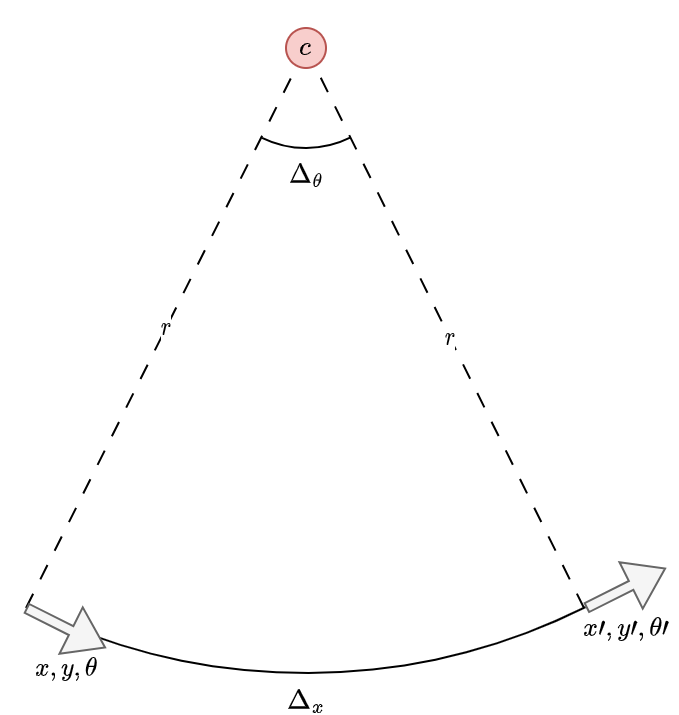

This is an assumption that the car moves in an arc, following the Kinematic Bicycle Model.

> **CAUTION:** The `arc` motion model is quite experimental, and not included in the paper. Use at your own risk.

To compute the values of $x', y', \theta'$ given an initial position $x, y, \theta$ and odometry values **in the car's frame** ($\Delta_{x}, \Delta_{y}, \Delta_{\theta}$), the following equations can be applied.

First find the center of rotation. Because we assume we travel in an arc, we can find the radius of the arc.

$$r = \Delta_{x} / \Delta_{\theta}$$

Then find the coordinates of the center of the circle. This depends on the sign of $\Delta_{\theta}$. Add or subtract $\pi/2$ accordingly.

$$ c_x = x + r \cos(\theta \pm \pi/2)$$
$$ c_y = y + r \sin(\theta \pm \pi/2)$$

Then we can traverse points around $c$ at distance $r$, we just need the angle. At this point, we also add any lateral motion, $\Delta_y$.

$$ \phi = \text{arctan2}(y-c_y, x-c_x)$$
$$ \theta' = \Delta_{\theta} + \theta$$
$$ x' = C_x + r \cos(\phi + \Delta_{\theta}) + \Delta_y \cos(\theta' + \pi/2) $$
$$ y' = C_y + r \sin(\phi + \Delta_{\theta}) + \Delta_y \cos(\theta' + \pi/2) $$

### Perturbing the Arc motion model
Gaussian noise is added to the values $\Delta_{x}, \Delta_{y}, \Delta_{\theta}$.

The variance $\sigma_x$ varies linearly with its value. Further/faster motions are more uncertain. There is a minimum uncertainty $\sigma_{x,min}$ as well.

$$ \sigma_x = \max(\sigma_{x,min}, k_{x}|\Delta_x|) $$

The variance $\sigma_y$ varies both on $\Delta_y$ and also on $\Delta_x$, as at high linear speeds we want to exactly find the position of the vehicle laterally. There are minimum $\sigma_{y,min}$ and maximum $\sigma_{y,max}$ uncertainties as well.

$$ \sigma_y = \min(\sigma_{y,max}, \max(\sigma_{y,min}, k_{y}|\Delta_y| + f(\Delta_x))) $$

This function $f(\Delta_x)$ kicks in above a minimum value of $\Delta_x$, $\Delta_{xy,min}$, and subsequently scales it linearly by $k_{xy}$. Here $\mathbb{1}$ is the indicator function.

$$ f(\Delta_x) = k_{xy}(|\Delta_x|-\Delta_{xy,min}) * \mathbb{1}^{[|\Delta_x|>\Delta_{xy,min}]} $$

Lastly, the variance $\sigma_{theta}$ varies linearly with its value. Larger rotations are more uncertain. There is a minimum uncertainty $\sigma_{\theta,min}$ as well.

$$ \sigma_\theta = \max(\sigma_{\theta,min}, k_{\theta}|\Delta_\theta|) $$

These values correspond to these parameters:
- `motion_dispersion_arc_x` - $k_x$ how change in x affects x noise
- `motion_dispersion_arc_y` - $k_y$ how change in y affects y noise
- `motion_dispersion_arc_theta` - $k_\theta$ how change in theta affects theta noise
- `motion_dispersion_arc_xy` - $k_xy$ how change in x affects y noise
- `motion_dispersion_arc_x_min` - $\sigma_{x,min}$ min noise in x
- `motion_dispersion_arc_y_min` - $\sigma_{y,min}$ min noise in y
- `motion_dispersion_arc_y_max` - $\sigma_{y,max}$ max noise in y
- `motion_dispersion_arc_theta_min` - $\sigma_{\theta,min}$ min noise in theta
- `motion_dispersion_arc_xy_min_x` - $\Delta_{xy,min}$ min delta_x before it affects y scaling

The default values in `pf2_params` are reasonable.